In [1]:
from threading import Lock
import warnings
import matplotlib.pyplot as plt
import pyximport
from tqdm import tnrange, tqdm_notebook

warnings.filterwarnings('ignore')

import sys
import os

sys.path.insert(0, os.path.join(os.getcwd(), os.pardir))
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

pyximport.install(setup_args={"include_dirs": np.get_include()})
import XXZZham as XXZZham
from XXZZham import add_high_energies, rotate_to_00_base
import random
import adiabatic_sim as asim
import time

import multiprocessing
import ctypes
mkl_rt = ctypes.CDLL('libmkl_rt.so')
mkl_get_max_threads = mkl_rt.mkl_get_max_threads
mkl_rt.mkl_set_num_threads(ctypes.byref(ctypes.c_int(multiprocessing.cpu_count())))
import os
import LH_tools as LHT

%precision %.15f
PRECISION  = 2 ** -40

from IPython.display import display
import FD_tools as FDT

In [12]:
T6 = 4.696969696969697

$\theta = 2\cdot \arccos (\sqrt{\frac{N-M}{N}})$

we set $M = 1$

$N = 2^n$

In [3]:
n = 6
N = 2**n 
M =1 
theta =  2*np.arccos(np.sqrt((N-M)/N))

In [7]:
U = hadamard_transform(6)* tensor([basis(2,0)] * 6)
LHT.braketify(U)

<IPython.core.display.Latex object>

In [8]:
s = tensor([basis(2,0)] * 6)

In [9]:
H0 = LHT.proj_orth(U)
H1 = LHT.proj_orth(s)

In [14]:
tlist = np.linspace(0,T6,100)
backprop, forwardprop = FDT.create_back_and_forward_props(tlist, H0, H1)

In [ ]:
alpha = U - s

In [21]:
alpha = U - s/np.sqrt(N)
print("Generated alpha with norm{} normalizing".format(alpha.norm()))
alpha = alpha/alpha.norm()
beta = s

Generated alpha with norm0.9921567416492215 normalizing


$\theta$

In [34]:
print(U.overlap(alpha), r"should be equal to cos(θ/2) which is " , np.cos(theta/2) ) 
print(U.overlap(beta) , r"should be equal to sin(θ/2) which is " , np.sin(theta/2) ) 

(0.992156741649+0j) should be equal to cos(θ/2) which is  0.992156741649
(0.125+0j) should be equal to sin(θ/2) which is  0.125


In [27]:
psi2 = backprop*forwardprop *U 

In [39]:
print(abs(psi2.overlap(alpha)), r"should be equal to cos(3θ/2) which is " , np.cos(3*theta/2) ) 
print(abs(psi2.overlap(beta)) , r"should be equal to sin(3θ/2) which is " , np.sin(3*theta/2) ) 

0.920332281174 should be equal to cos(3θ/2) which is  0.930146945296
0.39113743394 should be equal to sin(3θ/2) which is  0.3671875


Well.... this doesnt seem like a grover iteration

## 5/8/17 trying some new stuff

In [63]:
theta2 = np.arccos(abs(psi2.overlap(alpha)))
delta_theta2 = theta2-theta/2

In [64]:
psi3 = backprop*forwardprop * psi2

In [65]:
print(abs(psi3.overlap(alpha)), r"should be equal to cos(5θ/2) which is " , np.cos(5*theta/2) ) 
print(abs(psi3.overlap(beta)) , r"should be equal to sin(5θ/2) which is " , np.sin(5*theta/2) ) 

0.719470985879 should be equal to cos(5θ/2) which is  0.810002964862
0.69452249818 should be equal to sin(5θ/2) which is  0.58642578125


In [66]:
theta3 = np.arccos(abs(psi3.overlap(alpha)))
delta_theta3 = theta3-theta2

In [67]:
psi4 = backprop*forwardprop * psi3
print(abs(psi4.overlap(alpha)), r"should be equal to cos(7θ/2) which is " , np.cos(7*theta/2) ) 
print(abs(psi4.overlap(beta)) , r"should be equal to sin(7θ/2) which is " , np.sin(7*theta/2) )
theta4= np.arccos(abs(psi4.overlap(alpha)))
delta_theta4= theta4-theta3

0.429818971709 should be equal to cos(7θ/2) which is  0.639233799124
0.902915085464 should be equal to sin(7θ/2) which is  0.769012451172


In [68]:
psi5 = backprop*forwardprop * psi4
print(abs(psi5.overlap(alpha)), r"should be equal to cos(9θ/2) which is " , np.cos(9*theta/2) ) 
print(abs(psi5.overlap(beta)) , r"should be equal to sin(9θ/2) which is " , np.sin(9*theta/2) )
theta5= np.arccos(abs(psi5.overlap(alpha)))
delta_theta5= theta5-theta4

0.197059512889 should be equal to cos(9θ/2) which is  0.428512520941
0.980391528105 should be equal to sin(9θ/2) which is  0.903535842896


In [69]:
delta_theta2,delta_theta3,delta_theta4,delta_theta5

(0.276539332305882, 0.365888839931226, 0.358748049175161, 0.245934561330063)

In [70]:
psi6 = backprop*forwardprop * psi5
print(abs(psi6.overlap(alpha)), r"should be equal to cos(11θ/2) which is " , np.cos(11*theta/2) ) 
print(abs(psi6.overlap(beta)) , r"should be equal to sin(11θ/2) which is " , np.sin(11*theta/2) )
theta6= np.arccos(abs(psi6.overlap(alpha)))
delta_theta6= theta6-theta5

0.4042313205 should be equal to cos(11θ/2) which is  0.191009210199
0.914656787832 should be equal to sin(11θ/2) which is  0.981588244438


In [71]:
delta_theta2,delta_theta3,delta_theta4,delta_theta5,delta_theta6

(0.276539332305882,
 0.365888839931226,
 0.358748049175161,
 0.245934561330063,
 -0.217780559393099)

In [75]:

theta2/(theta/2) , theta3/theta2, theta4/theta3 , theta5/theta4

(3.206527709994776, 1.910472099208837, 1.467268308660605, 1.218316623687889)

## Maybe we should choose a different base ? 
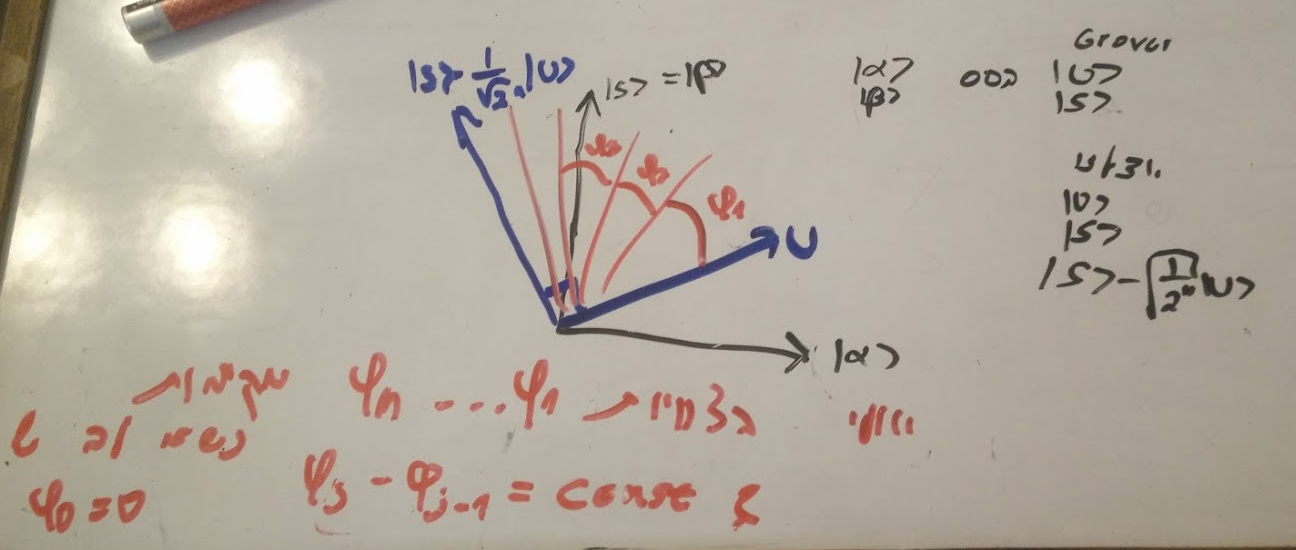

In [77]:
b1 = U
b2_nunorm = s - U.overlap(s)*U 
b2 = b2_nunorm/b2_nunorm.norm()

In [81]:
abs(b1.overlap(psi2))-abs(b1.overlap(psi3))

0.210447447602049

In [82]:
abs(b1.overlap(psi3))-abs(b1.overlap(psi4))

0.314168770737032

In [83]:
abs(b1.overlap(psi4))-abs(b1.overlap(psi5))


0.326634268791285

In [84]:
abs(b1.overlap(psi5))-abs(b1.overlap(psi6))

-0.291789884299180

### it seems like this also doesn't work


# Maybe using the term $P_U^K = \frac{1}{2}(1-cos\Omega_R^k)$

In [86]:
omega1 = np.arccos(1-2*np.abs(s.overlap(U))**2)
omega2 = np.arccos(1-2*np.abs(s.overlap(psi2))**2)
omega3 = np.arccos(1-2*np.abs(s.overlap(psi3))**2)
omega4 = np.arccos(1-2*np.abs(s.overlap(psi4))**2)
omega5 = np.arccos(1-2*np.abs(s.overlap(psi5))**2)

omega2-omega1 , omega3-omega2, omega4-omega3, omega5-omega4

(0.553078664611874, 0.731777679862503, 0.717496098350488, 0.491869122660709)

In [87]:
np.abs(s.overlap(U))**2

0.015625000000000

## This also doesn't work... maybe try big n?

In [105]:
H0n, H1n, psi0n =  FDT.prepare_groverlike_system(15)
T12 = 4.84343434343
tlist = np.linspace(0,T12,50)
backprop, forwardprop = FDT.create_back_and_forward_props(tlist, H0n, H1n)

In [106]:
psis = [psi0n] 
psi = psis[0]
for m in range(50):
    psi = backprop* forwardprop * psi
    psis.append (psi)


In [117]:
omega = np.arccos(1-2*np.abs(s.overlap(U))**2)
for psi in psis[1:]:
    newomega = np.arccos(1-2*np.abs(psi0n.overlap(psi))**2)
    domega = newomega - omega
    print(domega)
    omega= newomega

2.88484931925
-0.00608767200139
-0.00608767200128
-0.00608767200125
-0.00608767200119
-0.00608767200105
-0.00608767200091
-0.00608767200079
-0.00608767200058
-0.00608767200039
-0.00608767200016
-0.00608767199992
-0.00608767199964
-0.00608767199934
-0.00608767199904
-0.00608767199869
-0.00608767199833
-0.00608767199795
-0.00608767199755
-0.00608767199711
-0.00608767199666
-0.00608767199619
-0.00608767199569
-0.00608767199517
-0.00608767199463
-0.00608767199406
-0.00608767199347
-0.00608767199286
-0.00608767199222
-0.00608767199156
-0.00608767199088
-0.00608767199018
-0.00608767198944
-0.00608767198869
-0.00608767198792
-0.00608767198712
-0.0060876719863
-0.00608767198545
-0.00608767198458
-0.00608767198369
-0.00608767198277
-0.00608767198182
-0.00608767198086
-0.00608767197987
-0.00608767197886
-0.00608767197782
-0.00608767197676
-0.00608767197567
-0.00608767197456
-0.00608767197342


In [128]:
//theta =  2*np.arccos(np.sqrt(psi0n.overlap(psis[0])))

for psi in psis[1:]:
    newTheta = np.arccos(np.abs(psi0n.overlap(psi)))
    dtheta = newTheta - theta
    print(dtheta)
    theta= newTheta

SyntaxError: invalid syntax (<ipython-input-128-06058479ae64>, line 1)